In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Clean Data_2.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
y = df['Schiller']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
import xgboost as xgb

# Buidling Model before Feature Selection

### Logistic Regression

In [10]:
logmodel = LogisticRegression(max_iter=10000)

In [11]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [12]:
predictions = logmodel.predict(X_test)

In [13]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9186046511627907


              precision    recall  f1-score   support

           0       0.92      0.99      0.96       157
           1       0.67      0.13      0.22        15

    accuracy                           0.92       172
   macro avg       0.79      0.56      0.59       172
weighted avg       0.90      0.92      0.89       172



[[156   1]
 [ 13   2]]


### KNN

In [14]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

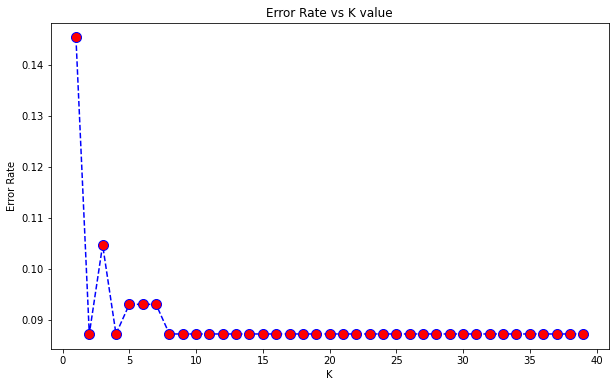

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [17]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9127906976744186


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       157
           1       0.00      0.00      0.00        15

    accuracy                           0.91       172
   macro avg       0.46      0.50      0.48       172
weighted avg       0.83      0.91      0.87       172



[[157   0]
 [ 15   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
predictions = dtree.predict(X_test)

In [21]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8197674418604651


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       157
           1       0.17      0.27      0.21        15

    accuracy                           0.82       172
   macro avg       0.55      0.57      0.55       172
weighted avg       0.86      0.82      0.84       172



[[137  20]
 [ 11   4]]


### Random Forest

In [22]:
rfc = RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
predictions = rfc.predict(X_test)

In [25]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9011627906976745


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       157
           1       0.25      0.07      0.11        15

    accuracy                           0.90       172
   macro avg       0.58      0.52      0.53       172
weighted avg       0.86      0.90      0.87       172



[[154   3]
 [ 14   1]]


### Support Vector Machine

In [26]:
model = SVC()

In [27]:
model.fit(X_train,y_train)

SVC()

In [28]:
predictions = model.predict(X_test)

In [29]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9127906976744186


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       157
           1       0.00      0.00      0.00        15

    accuracy                           0.91       172
   macro avg       0.46      0.50      0.48       172
weighted avg       0.83      0.91      0.87       172



[[157   0]
 [ 15   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Grid Search CV

In [30]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [31]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [32]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 3/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [33]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [34]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [35]:
grid.best_score_

0.9181408329755261

In [36]:
predictions = grid.predict(X_test)

In [37]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9127906976744186


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       157
           1       0.00      0.00      0.00        15

    accuracy                           0.91       172
   macro avg       0.46      0.50      0.48       172
weighted avg       0.83      0.91      0.87       172



[[157   0]
 [ 15   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [38]:
gnb = GaussianNB()

In [39]:
gnb.fit(X_train,y_train)

GaussianNB()

In [40]:
predictions = gnb.predict(X_test)

In [41]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8081395348837209


              precision    recall  f1-score   support

           0       0.95      0.83      0.89       157
           1       0.24      0.53      0.33        15

    accuracy                           0.81       172
   macro avg       0.59      0.68      0.61       172
weighted avg       0.89      0.81      0.84       172



[[131  26]
 [  7   8]]


### XGBoost

In [42]:
xgb_cl = xgb.XGBClassifier()

In [43]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
predictions = xgb_cl.predict(X_test)

In [45]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8837209302325582


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       157
           1       0.22      0.13      0.17        15

    accuracy                           0.88       172
   macro avg       0.57      0.54      0.55       172
weighted avg       0.86      0.88      0.87       172



[[150   7]
 [ 13   2]]


### Neural Network

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
model = Sequential()

# input layer
model.add(Dense(units=26,activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(units=13,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# compiler
model.compile(loss='binary_crossentropy', optimizer='adam')

In [51]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [52]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
22/22 [==============================] - 0s 6ms/step - loss: 6.0840 - val_loss: 1.0113
Epoch 2/600
22/22 [==============================] - 0s 2ms/step - loss: 2.4211 - val_loss: 0.4217
Epoch 3/600
22/22 [==============================] - 0s 3ms/step - loss: 1.6390 - val_loss: 0.4971
Epoch 4/600
22/22 [==============================] - 0s 2ms/step - loss: 1.4363 - val_loss: 0.4924
Epoch 5/600
22/22 [==============================] - 0s 2ms/step - loss: 1.3132 - val_loss: 0.4627
Epoch 6/600
22/22 [==============================] - 0s 2ms/step - loss: 1.1454 - val_loss: 0.4094
Epoch 7/600
22/22 [==============================] - 0s 2ms/step - loss: 0.8952 - val_loss: 0.3845
Epoch 8/600
22/22 [==============================] - 0s 2ms/step - loss: 0.8843 - val_loss: 0.3714
Epoch 9/600
22/22 [==============================] - 0s 2ms/step - loss: 0.6982 - val_loss: 0.3701
Epoch 10/600
22/22 [==============================] - 0s 3ms/step - loss: 0.7320 - val_loss: 0.3651
Epoch 11/

<AxesSubplot:>

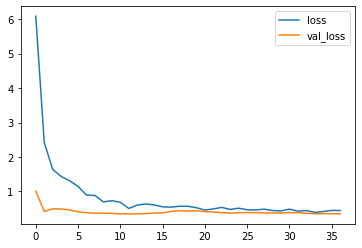

In [53]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [54]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [55]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9127906976744186


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       157
           1       0.00      0.00      0.00        15

    accuracy                           0.91       172
   macro avg       0.46      0.50      0.48       172
weighted avg       0.83      0.91      0.87       172



[[157   0]
 [ 15   0]]


C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ngoa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
